<a href="https://colab.research.google.com/github/charigardash/PotholesDetectionYOLOv8/blob/main/PotholeDetectionAndSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from IPython.display import Image

In [2]:
!git clone https://github.com/MuhammadMoin97/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 3878, done.
remote: Total 3878 (delta 0), reused 0 (delta 0), pack-reused 3878 (from 1)
Receiving objects: 100% (3878/3878), 1.82 MiB | 23.91 MiB/s, done.
Resolving deltas: 100% (2691/2691), done.


In [31]:
%cd /content/ultralytics

/content/ultralytics


In [32]:
!pip install -e .'[dev]'

Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.3
    Uninstalling ultralytics-8.0.3:
      Successfully uninstalled ultralytics-8.0.3
  Running setup.py develop for ultralytics


In [10]:
%cd /content/ultralytics/ultralytics/yolo/v8/segment

/content/ultralytics/ultralytics/yolo/v8/segment


In [11]:
!pwd

/content/ultralytics/ultralytics/yolo/v8/segment


In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JJAHEX1LWcZXzEcLmsuE")
project = rf.workspace("mdosamaansari").project("potholedetectionandsegmentation-n9m5o")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PotholeDetectionAndSegmentation-1 in yolov5pytorch:: 100%|██████████| 480/480 [00:00<00:00, 5826.82it/s]


In [13]:
HOME = "/content/ultralytics/ultralytics/yolo/v8/segment"

In [14]:
dataset.location

'/content/ultralytics/ultralytics/yolo/v8/segment/PotholeDetectionAndSegmentation-1'

In [15]:
%cd {HOME}

!python train.py model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=120 imgsz=640

/content/ultralytics/ultralytics/yolo/v8/segment
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/ultralytics/ultralytics/yolo/v8/segment/PotholeDetectionAndSegmentation-1/data.yaml, epochs=120, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17,

#*Checking the Files in the Training Folder**

In [17]:
!ls /content/ultralytics/runs/segment/train2

args.yaml					    MaskP_curve.png	 train_batch1431.jpg
BoxF1_curve.png					    MaskPR_curve.png	 train_batch1432.jpg
BoxP_curve.png					    MaskR_curve.png	 train_batch1.jpg
BoxPR_curve.png					    predictions.json	 train_batch2.jpg
BoxR_curve.png					    results.csv		 val_batch0_labels.jpg
confusion_matrix.png				    results.png		 val_batch0_pred.jpg
events.out.tfevents.1723818798.2c337e809d2d.3165.0  train_batch0.jpg	 weights
MaskF1_curve.png				    train_batch1430.jpg


#**Validate the Custom Model**

In [18]:
!python val.py model='/content/ultralytics/runs/segment/train2/weights/best.pt' data={dataset.location}/data.yaml

2024-08-16 15:21:37.349622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 15:21:37.378176: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 15:21:37.384401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-16 15:21:37.400461: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-16 15:21:38.771293: W tensorflow/compiler/tf2

#**Predictions on Validation Batch as well**

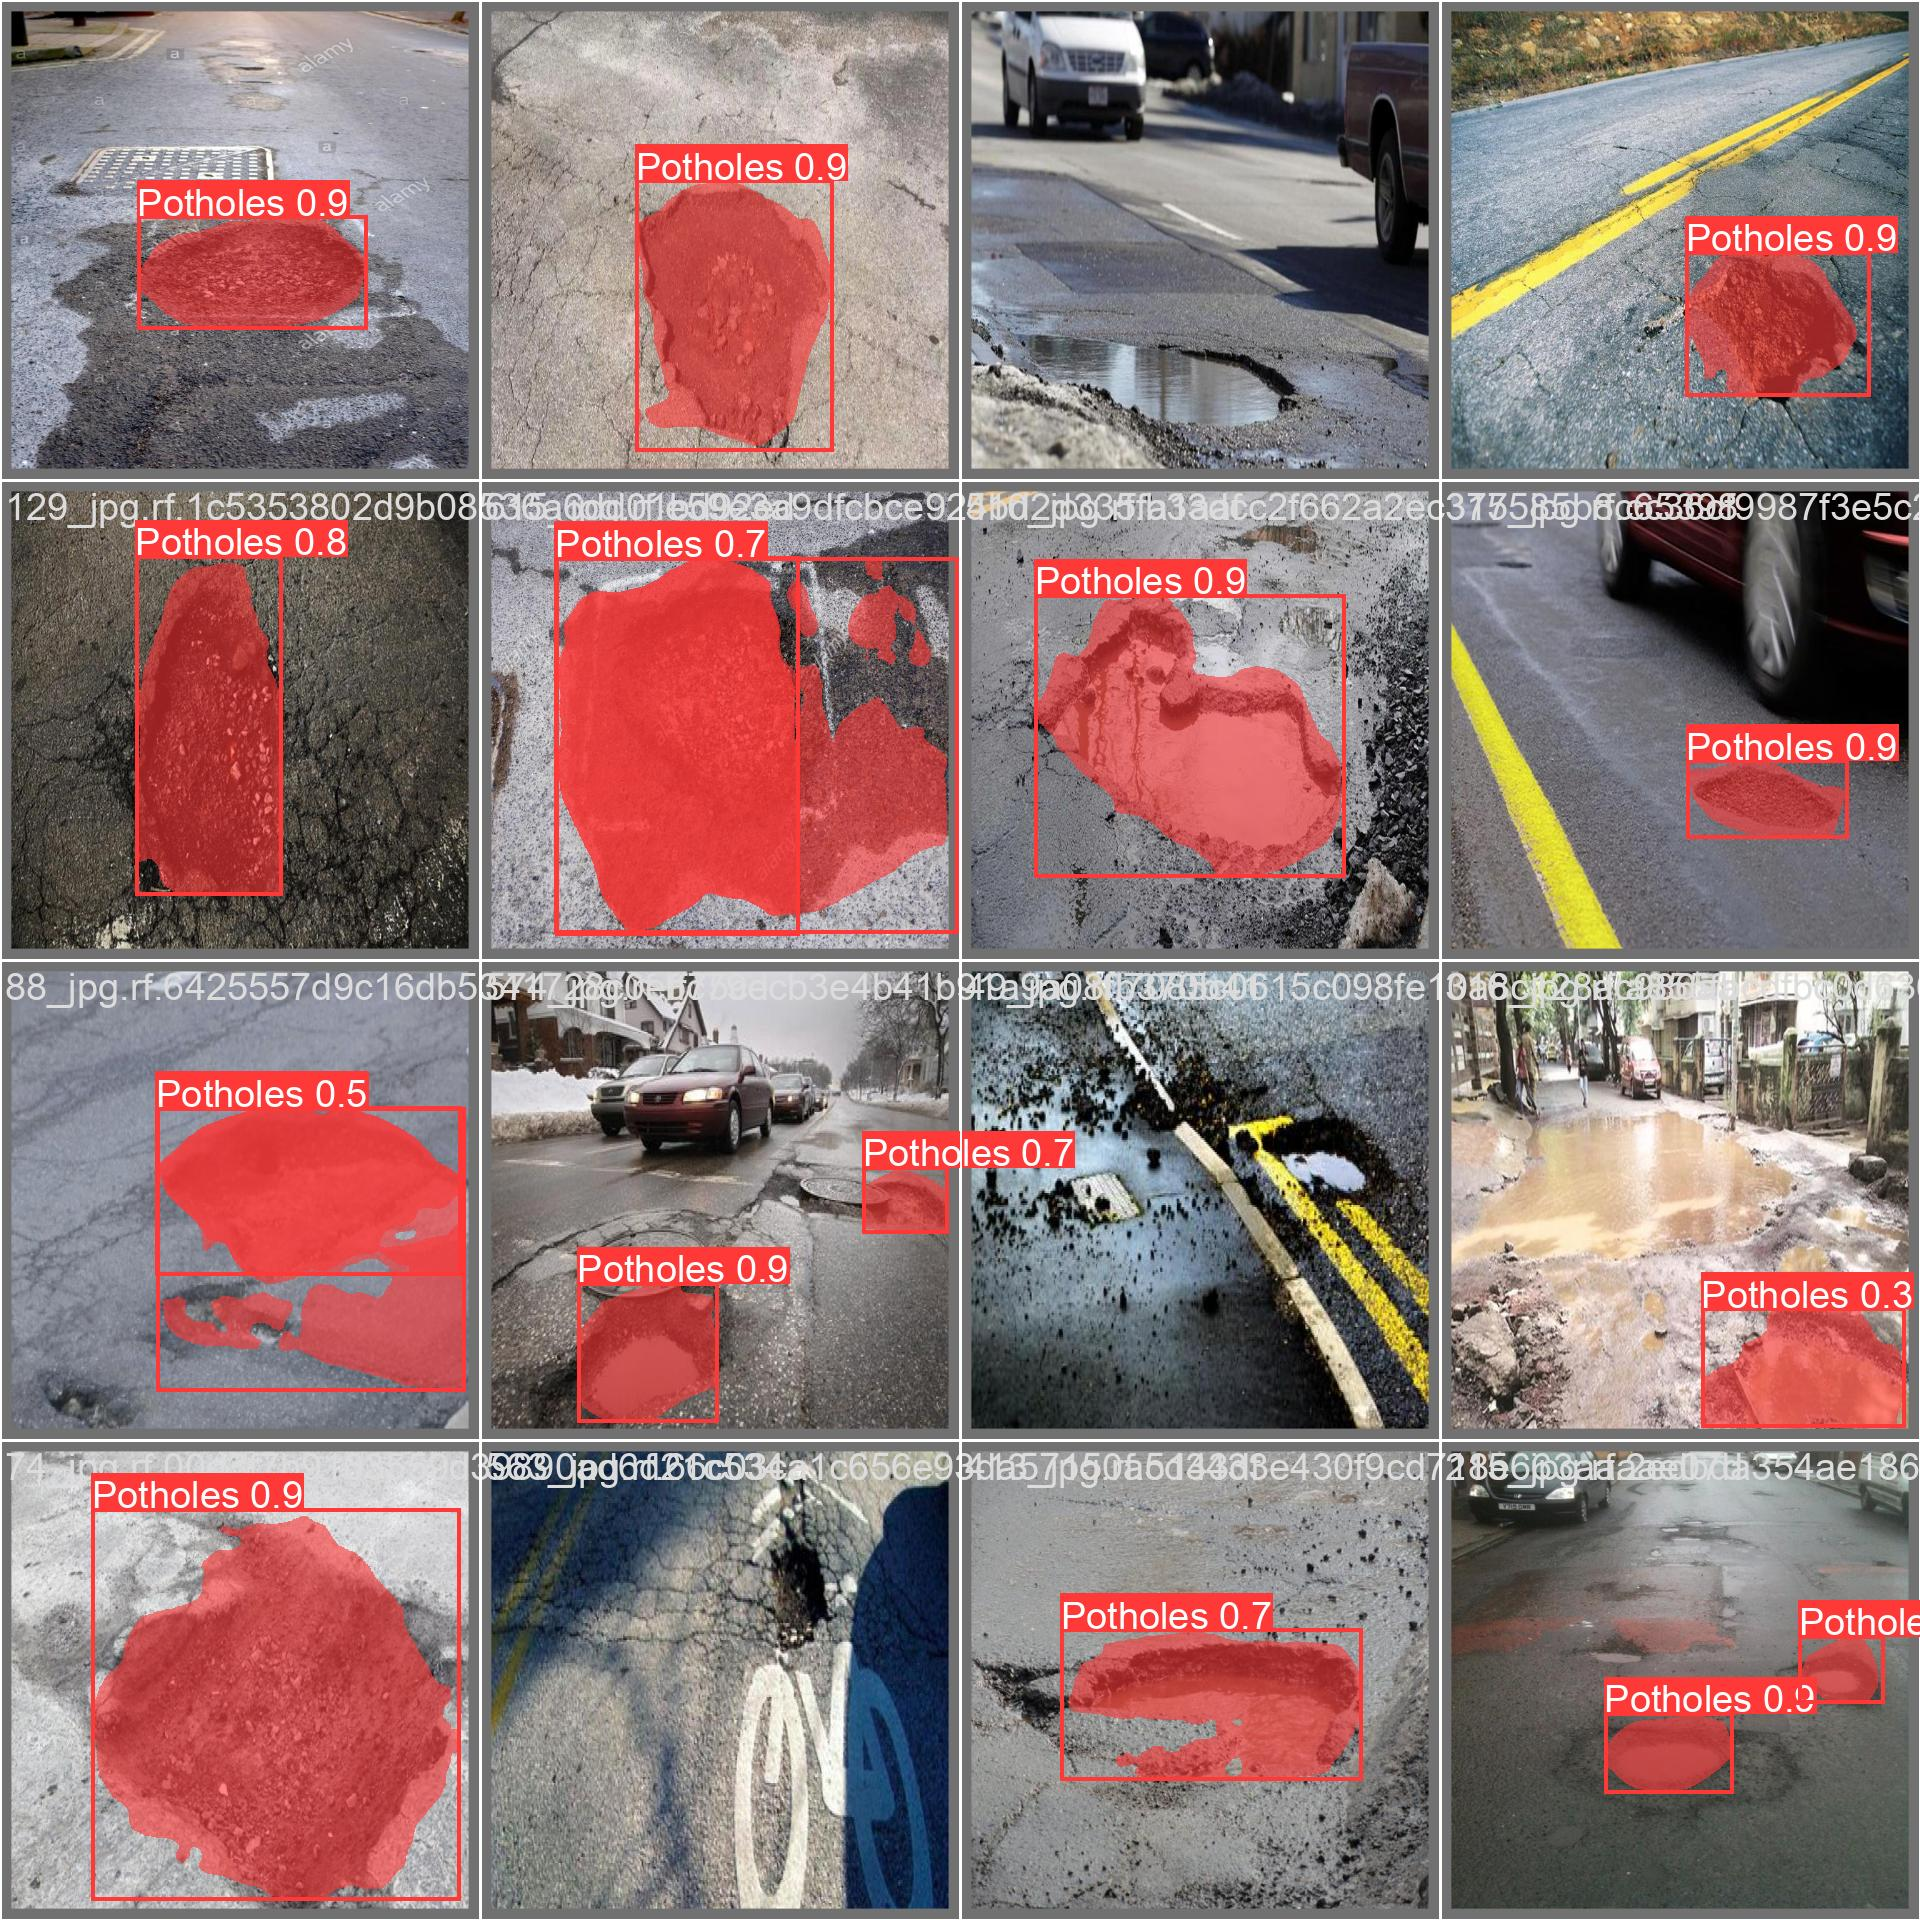

In [21]:
Image("/content/ultralytics/runs/segment/train2/val_batch0_pred.jpg")

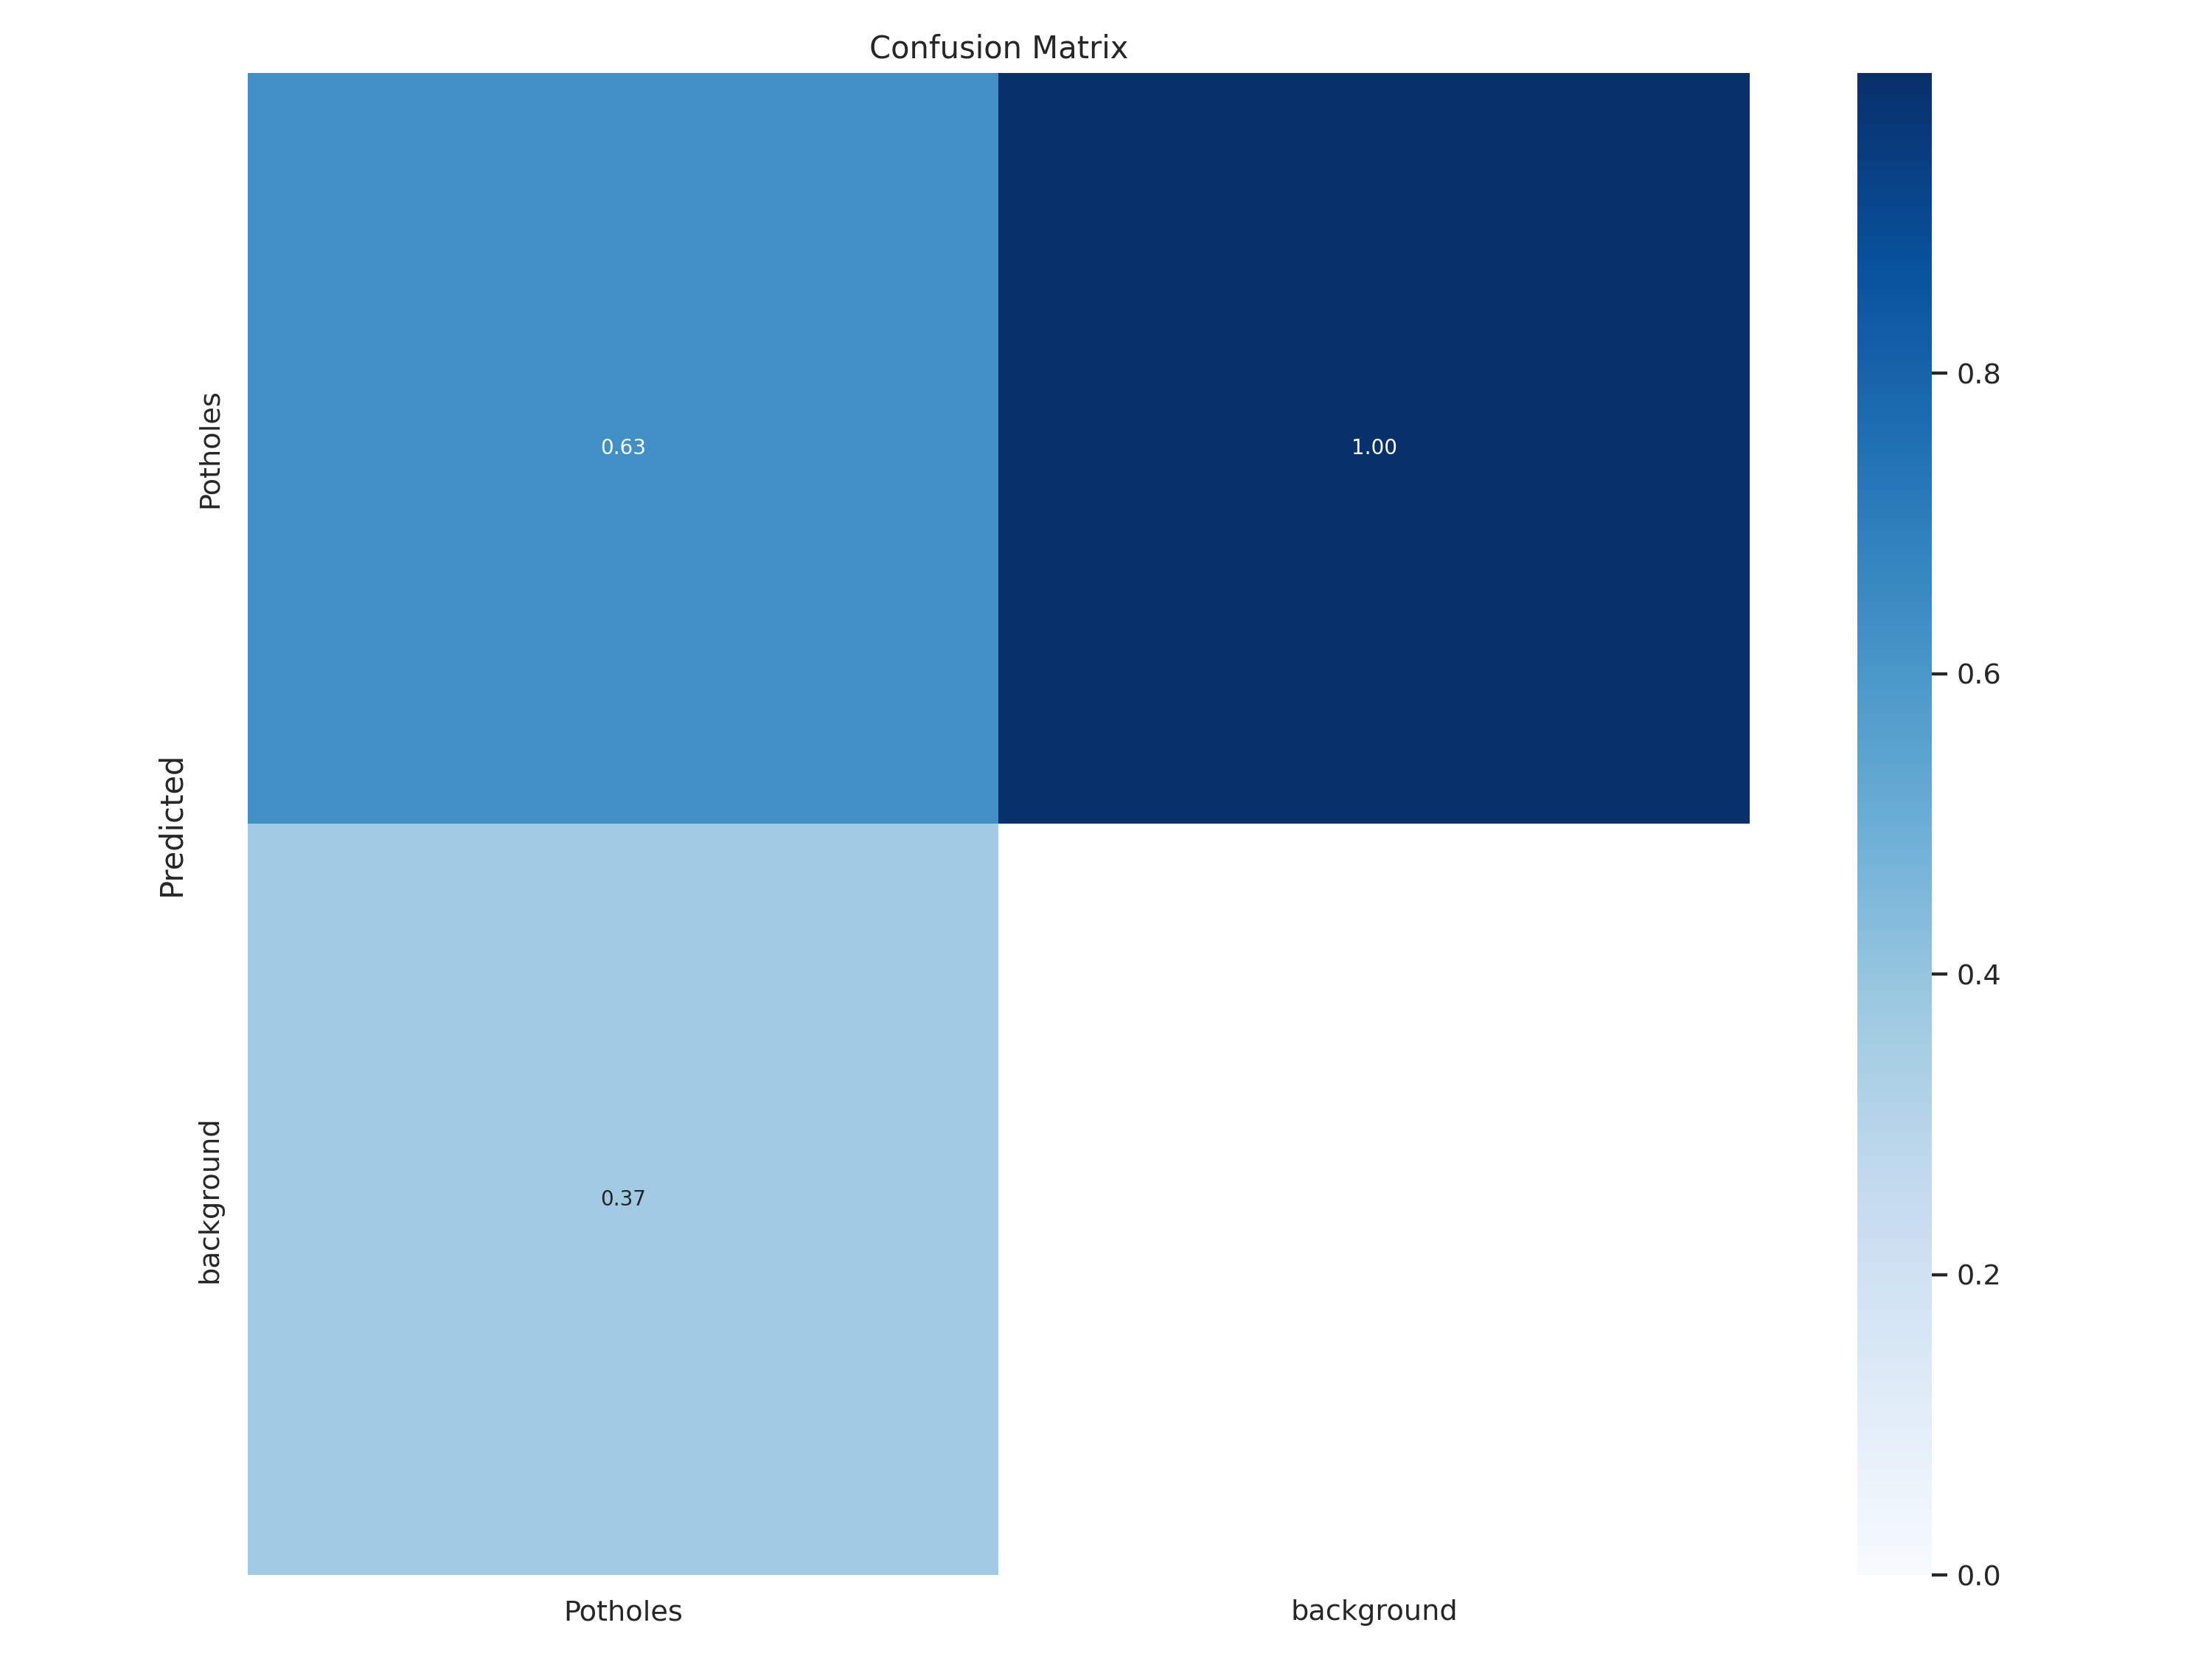

In [23]:
Image("/content/ultralytics/runs/segment/train2/confusion_matrix.png")

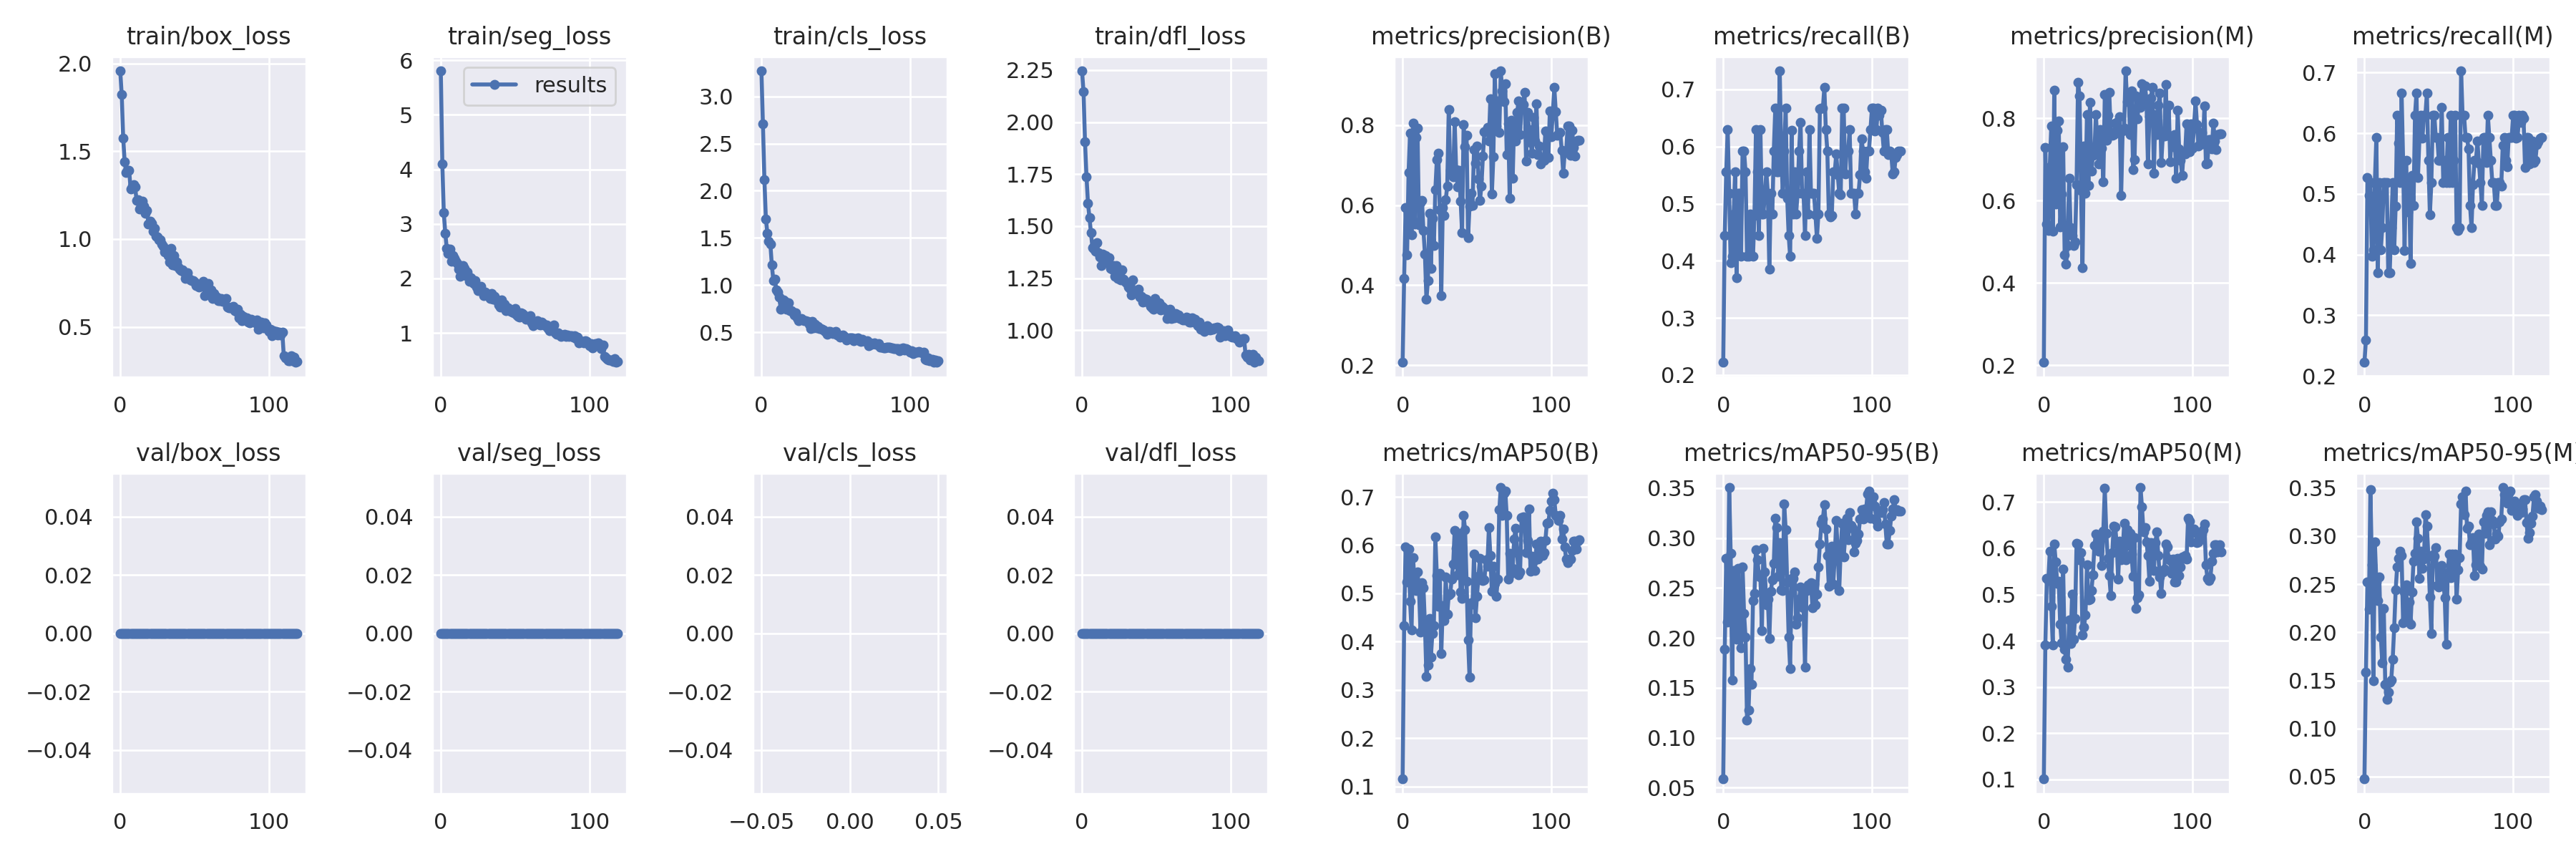

In [24]:
Image("/content/ultralytics/runs/segment/train2/results.png")

#**Downloading the Demo Video**

In [25]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/ultralytics/ultralytics/yolo/v8/segment/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 61.9MB/s]


#**Downloading the Weights File From the Drive**

In [26]:
!gdown "https://drive.google.com/uc?id=1V2k7WF3hgx7wKMwO3G-DVOCGeI73xlGf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1V2k7WF3hgx7wKMwO3G-DVOCGeI73xlGf&confirm=t
To: /content/ultralytics/ultralytics/yolo/v8/segment/best.pt
100% 92.3M/92.3M [00:01<00:00, 46.4MB/s]


#**Testing the Model**

In [28]:
!python predict.py model='/content/ultralytics/runs/segment/train2/weights/best.pt' source='demo.mp4'

2024-08-16 15:27:39.365487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 15:27:39.385842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 15:27:39.391902: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-16 15:27:39.406888: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-16 15:27:40.407425: W tensorflow/compiler/tf2

#**Display the Demo Video**

In [34]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/ultralytics/runs/detect/train3/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)